In [36]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

from matplotlib import pyplot as plt

plt.rcdefaults()
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

In [34]:
df = pd.read_csv('temperature-intensity.csv')

T = df.iloc[:,1].to_numpy()
I = df.iloc[:,2].to_numpy()

T_norm = (T - np.mean(T))/np.std(T)
I_norm = (I - np.min(I))/np.std(I)

In [37]:
import numpy as np

def sinc2_linear(x, A, x0, w, m, b):
    # sinc function + linear component
    # A = amplitude, x0 = center, w = width parameter, m = slope, b = offset
    arg = (x - x0) / w
    return A * np.sinc(arg)**2 + m * x + b

# Initial guesses based on your estimates
# np.sinc(x) = sin(pi*x)/(pi*x), FWHM of sinc ≈ 1.21 * w
# So w ≈ FWHM / 1.21 ≈ 1 / 1.21 ≈ 0.83
p0 = [3, 0.3, 0.83, 0, 0]

popt, pcov = curve_fit(sinc2_linear, T_norm, I_norm, p0=p0)

A, x0, w, m, b = popt
print(f"Amplitude: {A:.4f}")
print(f"Center:    {x0:.4f}")
print(f"Width:     {w:.4f}")
print(f"Slope:     {m:.4f}")
print(f"Offset:    {b:.4f}")

# Generate fitted curve
T_norm_fit = np.linspace(T_norm.min(), T_norm.max(), 500)
I_norm_fit = sinc2_linear(T_norm_fit, *popt)

Amplitude: 2.7923
Center:    0.2028
Width:     1.0109
Slope:     0.0267
Offset:    0.0394


Peak location: T=191.8784
Peak width: dT=6.1740


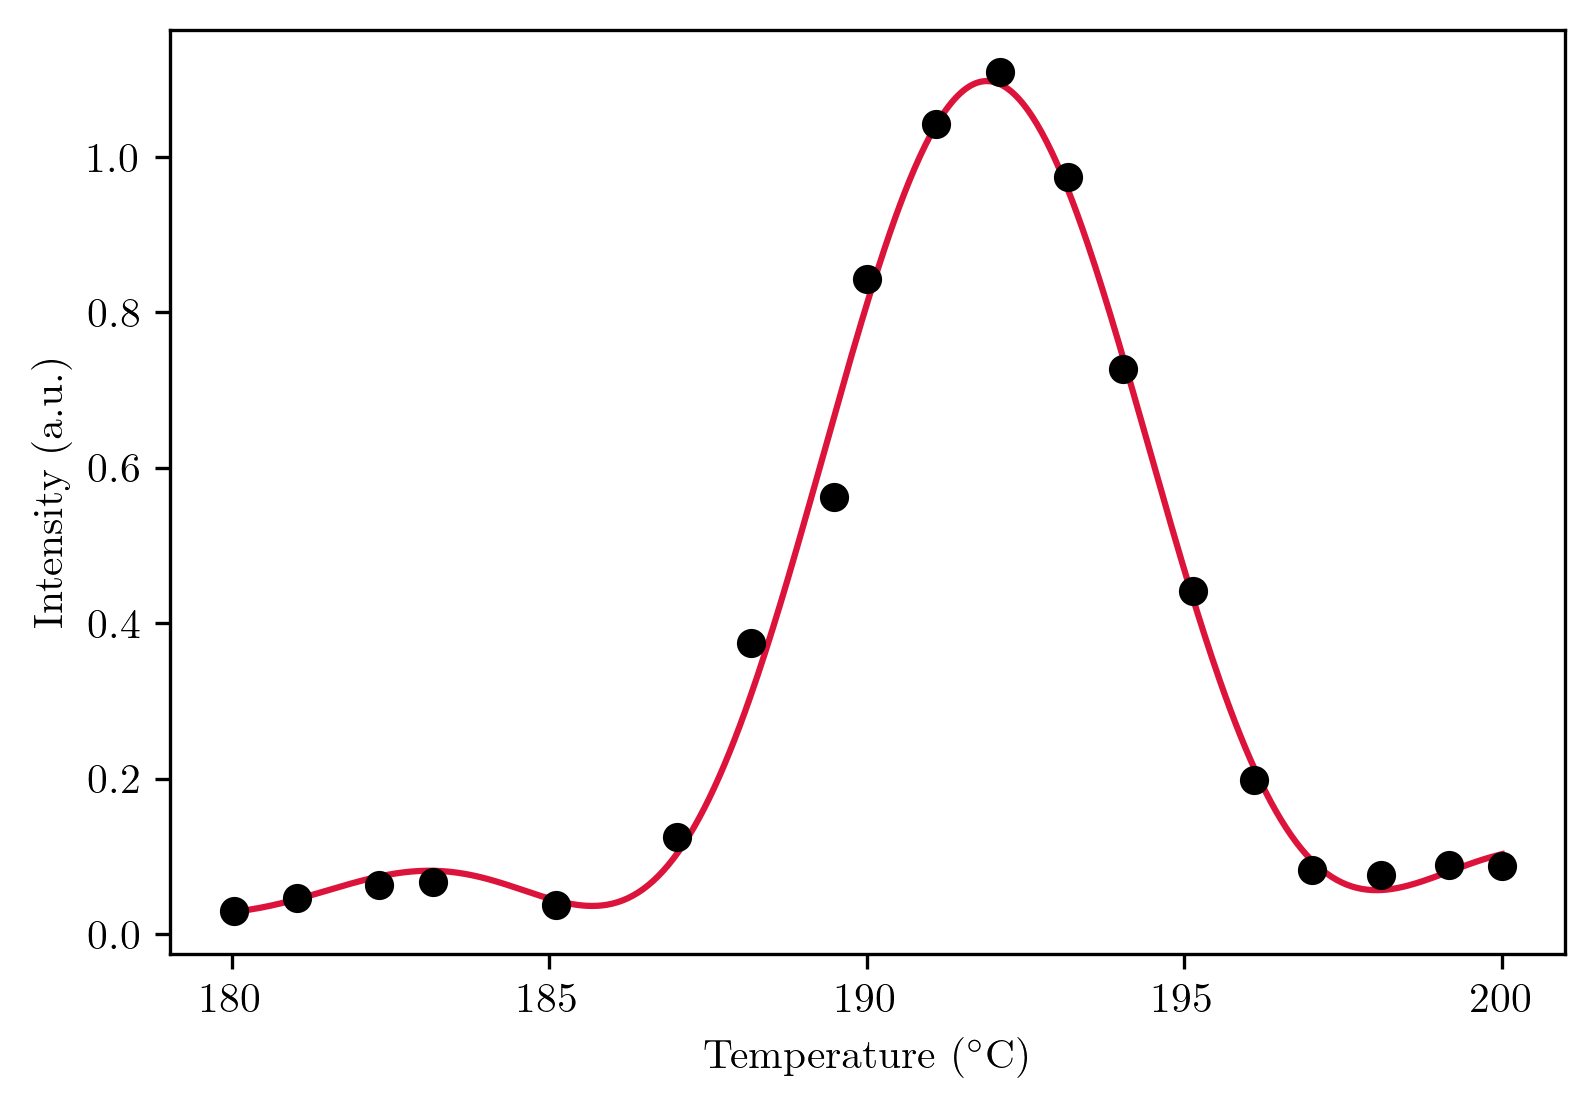

In [42]:
fig, ax = plt.subplots(figsize=(6,4), dpi=300)

#ax.set_yscale('log')

T_fit = np.std(T)*T_norm_fit + np.mean(T)
I_fit = np.std(I)*I_norm_fit + np.min(I)

T0 = np.std(T)*x0 + np.mean(T)
T_width = np.std(T)*w

ax.plot(T_fit, I_fit, color='crimson', zorder=1)
ax.scatter(T, I, color='k', zorder=2)

ax.set_xlabel('Temperature ($^{\\circ}$C)')
ax.set_xticks([180, 185, 190, 195, 200])
ax.set_ylabel('Intensity (a.u.)')

print(f'Peak location: T={T0:.4f}')
print(f'Peak width: dT={T_width:.4f}')

plt.show()